# Extended Data Fig. 2 Analysing the putative NPCs in adult humans.


## Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scanpy as sc

In [3]:
import pickle

In [4]:
import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
#import scvi

from glob import iglob
from tqdm import tqdm

import scanpy as sc
import pickle
from glob import iglob 
from scipy.stats import median_abs_deviation

In [5]:
from scAnnot.tools import *

In [6]:
import pandas as pd

In [1]:
import os
from glob import iglob
import scvelo as scv
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import pickle
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.7.12) on 2023-11-29 16:31.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [7]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

In [8]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        try:
            tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
        except:
            pass

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color= adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

In [9]:
def msample(x, n, frac):
    """
    sample the matrix by number or by fraction.
    if the fraction is larger than the sample number, use number for sampling. Otherwise, use fraction.
    Input
    -----
    x: the matrix to be split
    n: number of vectors to be sampled
    frac: fraction of the total matrix to be sampled
    return
    -----
    sampled selection.
    """
    if len(x) <= np.floor(n / frac):
        if len(x) < 10: frac = 0.9
        return x.sample(frac=frac)
    else:
        return x.sample(n=n)

## Readin

In [ ]:
ad=sc.read('data/results/hm3f1a_hip_integration_palantir.h5ad')

In [27]:
label={
'Glutamatergic neurons':'Glutamatergic', 
'Mature neurons':'Glutamatergic', 
'Astrocytes':'Astrocyte', 
'Radial glial cells':'Astrocyte', 
'Neuroblasts':'Neuroblast', 
'Immature neurons':'Immature Glutamatergic', 
'Neural Progenitor cells':'Neural progenitor'
}

## The trajectory bifurcating to astrocytes and to mature neurons

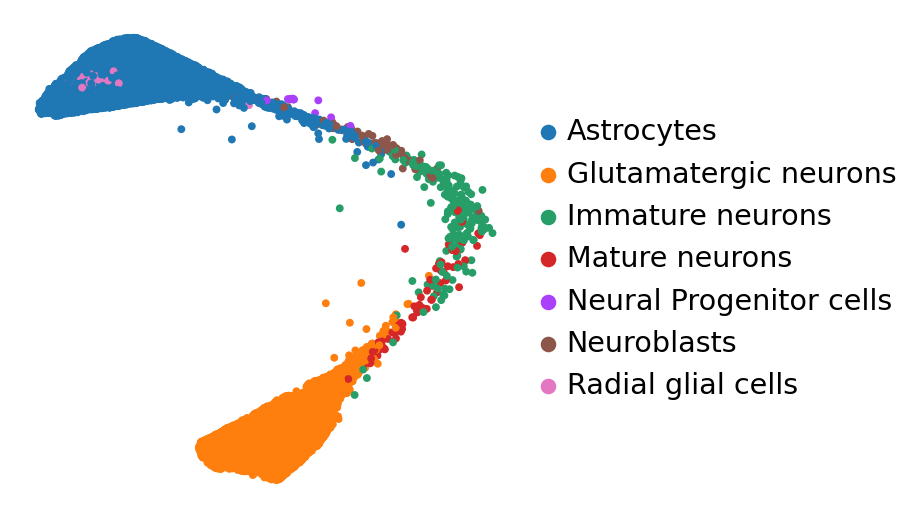

In [22]:
figsize(4,4)
sc.pl.draw_graph(ad, color=['louvain2'], frameon=False,size=50,title='',save='sfig4_umap_1.pdf')

In [17]:
ad.uns['iroot'] = np.flatnonzero(ad.obs['louvain2'] == 'Neural Progenitor cells')[0]

In [18]:
ad.obs['dpt_pseudotime_old']=ad.obs.dpt_pseudotime

In [19]:
sc.tl.dpt(ad)

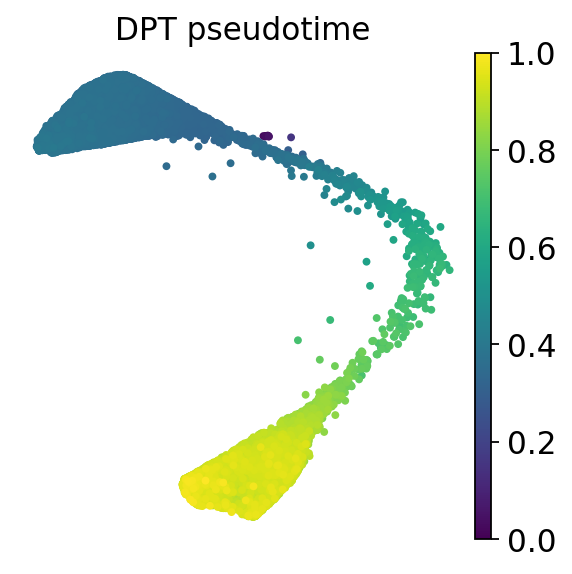

In [21]:
figsize(4,4)
sc.pl.draw_graph(ad, color=['dpt_pseudotime'], legend_loc='on data',frameon=False,size=50,title='DPT pseudotime',save='sfig4b_umap1.pdf')

## RNA velocity analysis

In [3]:
adata = sc.read('results/scvelo_raw_allcells.h5ad')

In [ ]:
scv.pp.filter_and_normalize(adata, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:43) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [ ]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:47) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


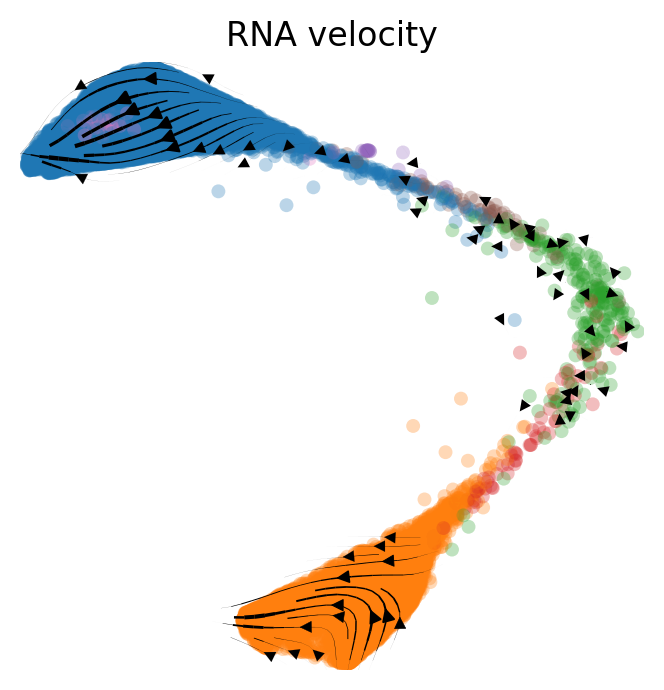

In [25]:
figsize(4,4)
fig,ax=plt.subplots()
scv.pl.velocity_embedding_stream(adata, basis='draw_graph_fa', color=celltype, size=100, title='RNA velocity',legend_loc='none',ax=ax,show=False)
plt.savefig('figures/sfig4c_umap.svg',dpi=300, bbox_inches='tight',transparent=True)

## Volcano plot of adult DEGs

In [62]:
import seaborn as sns

In [109]:
deg=pd.read_csv("data/hipngs/adult_npc_DEG.csv",index_col=0)

In [110]:
deg

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
TOP2A,8.167411e-130,2.986527,0.65,0.001,8.481040e-126
MKI67,1.474533e-107,2.089066,0.50,0.000,1.531155e-103
RRM2,3.249006e-100,2.532023,0.55,0.002,3.373767e-96
TPX2,8.704927e-93,2.005857,0.55,0.003,9.039196e-89
CENPF,2.867530e-87,2.743667,0.45,0.001,2.977643e-83
...,...,...,...,...,...
BRD8,9.993833e-01,-0.156855,0.10,0.098,1.000000e+00
UBE2G2,9.995342e-01,-0.242277,0.20,0.188,1.000000e+00
SAT1,1.000000e+00,-0.661523,0.15,0.138,1.000000e+00
MTIF3,1.000000e+00,-0.266300,0.10,0.097,1.000000e+00


In [111]:
deg['gene']=list(deg.index)

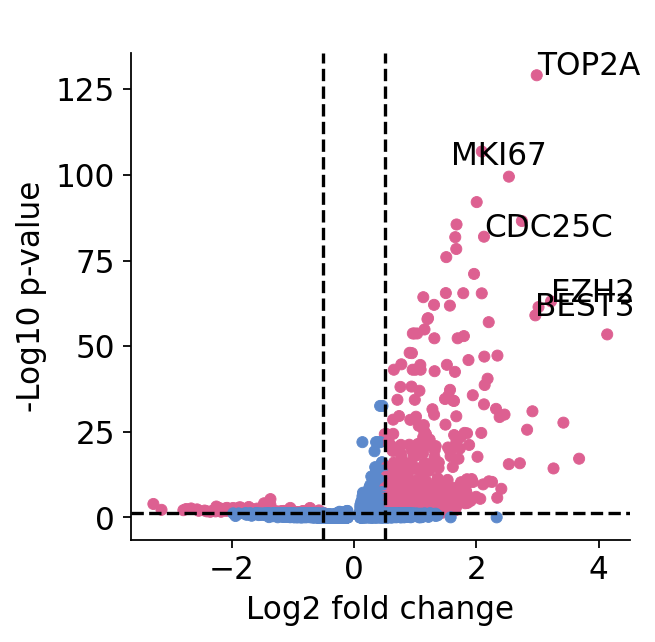

In [112]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A','MKI67','CDC25C','BEST3','EZH2'],
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [115]:
list(deg.gene[:20])

['TOP2A',
 'MKI67',
 'RRM2',
 'TPX2',
 'CENPF',
 'BUB1',
 'CDC25C',
 'BRCA2',
 'KIF18B',
 'GTSE1',
 'NCAPG',
 'PBK',
 'FBXO5',
 'ASPM',
 'AURKB',
 'EZH2',
 'CKAP2L',
 'DTL',
 'SMC4',
 'BEST3']

In [118]:
top_10_proliferation_genes = [
    'MKI67',  # Marker of Proliferation Ki-67
    'TOP2A',  # DNA Topoisomerase II Alpha
    'RRM2',   # Ribonucleotide Reductase Regulatory Subunit M2
    'CENPF',  # Centromere Protein F
    'BUB1',   # BUB1 Mitotic Checkpoint Serine/Threonine Kinase
    'CDC25C', # Cell Division Cycle 25C
    'AURKB',  # Aurora Kinase B
    #'TPX2',   # Targeting Protein For Xklp2
    #'KIF18B', # Kinesin Family Member 18B
    #'GTSE1'   # G2 And S Phase Expressed 1
]

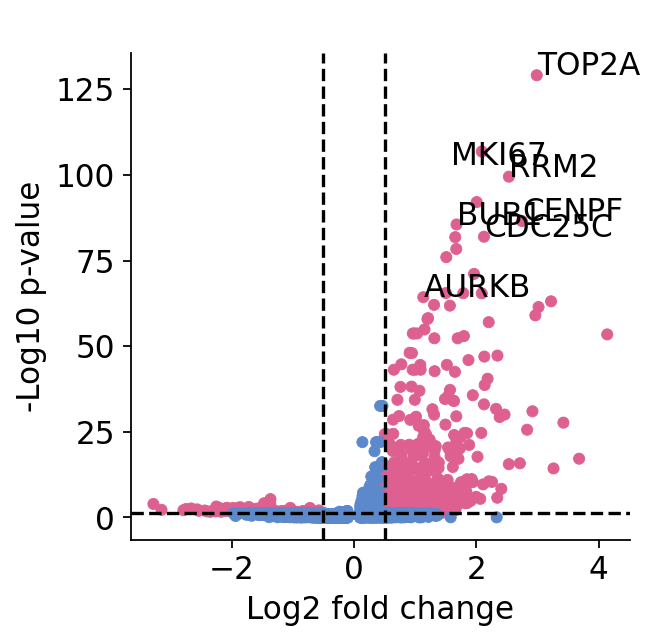

In [119]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = top_10_proliferation_genes,
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

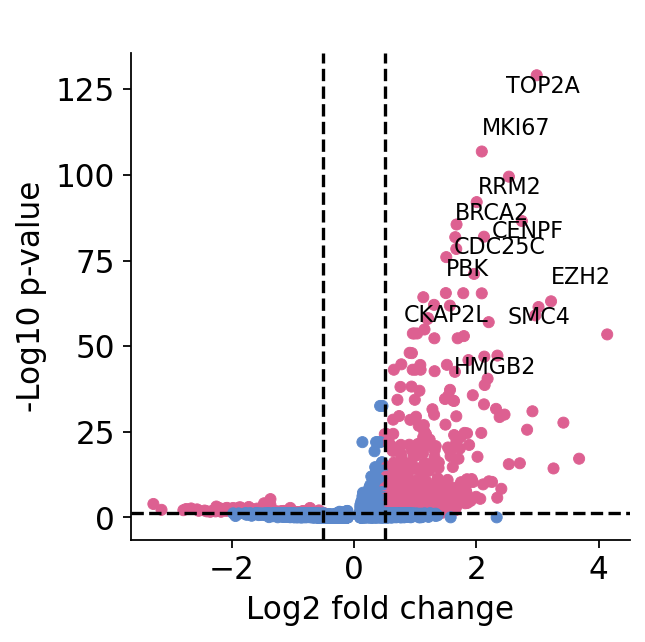

In [148]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

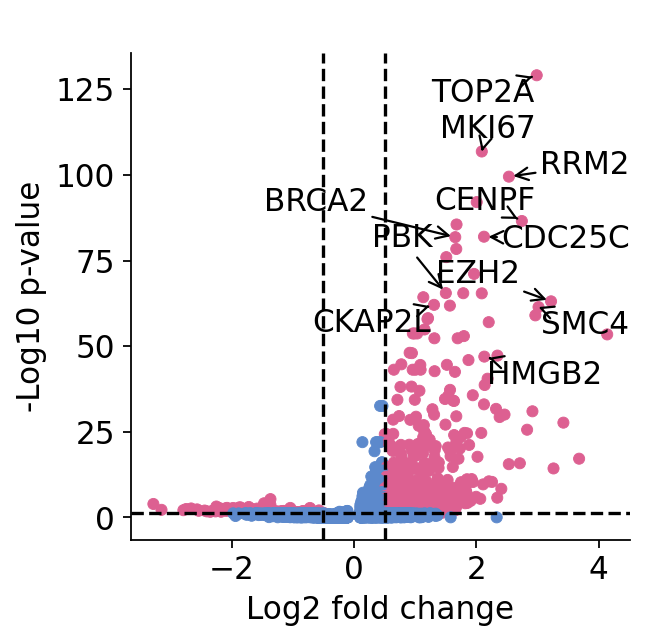

In [159]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

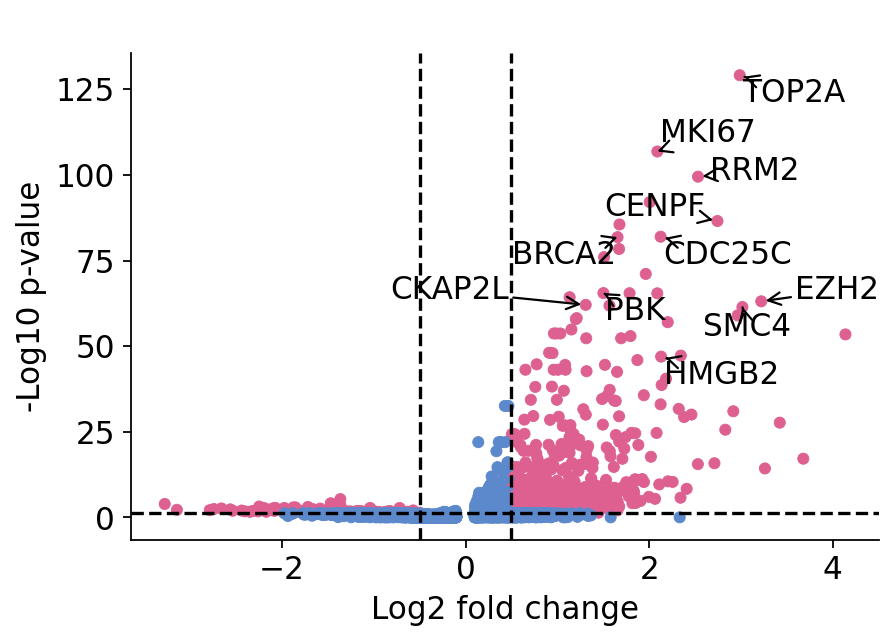

In [305]:
figsize(6,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs2.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

def enhanced_volcano(toptable, x, y, lab, pCutoff = 0.05, FCcutoff = 1, pointSize = 5, 
                     colors = {"sig": "red", "not sig": "blue"}, selectLab = None, xlim = None):
    assert pd.api.types.is_numeric_dtype(toptable[x]), f"{x} is not numeric!"
    assert pd.api.types.is_numeric_dtype(toptable[y]), f"{y} is not numeric!"

    toptable = toptable.copy()
    toptable['Significance'] = np.where((abs(toptable[x]) > FCcutoff) & (toptable[y] < pCutoff), 'sig', 'not sig')
    toptable['-log10(p-value)'] = -np.log10(toptable[y])
    toptable.loc[toptable[y] == 0, y] = 1e-10

    # Create the scatterplot
    sns.scatterplot(data=toptable, x=x, y='-log10(p-value)', hue='Significance', palette=colors, s=pointSize, edgecolor=None)

    # Draw a vertical line at FCcutoff
    plt.axvline(x=FCcutoff, color='black', linestyle='--')
    plt.axvline(x=-FCcutoff, color='black', linestyle='--')

    # Draw a horizontal line at pCutoff
    plt.axhline(y=-np.log10(pCutoff), color='black', linestyle='--')

    texts = []
    if selectLab is not None:
        for i in range(toptable.shape[0]):
            if toptable[lab].iloc[i] in selectLab:
                # Only annotate points that are significant
                if toptable['Significance'].iloc[i] == 'sig':
                    texts.append(plt.text(toptable[x].iloc[i], toptable['-log10(p-value)'].iloc[i], toptable[lab].iloc[i]))

    # Optimize text placement to minimize overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), ax=plt.gca())
    #adjust_text(texts, ax=plt.gca())

    # Set x-axis limits
    if xlim is not None:
        plt.xlim(xlim)
        
    # Add title and labels
    plt.title(' ')
    plt.xlabel('Log2 fold change')
    plt.ylabel('-Log10 p-value')

    # Remove the legend
    plt.legend().remove()

## Top DEGs

In [293]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.grid'] = False

In [34]:
ad1=sc.AnnData(X=ad.X.copy(),obs=ad.obs.copy(),var=ad.var.copy())

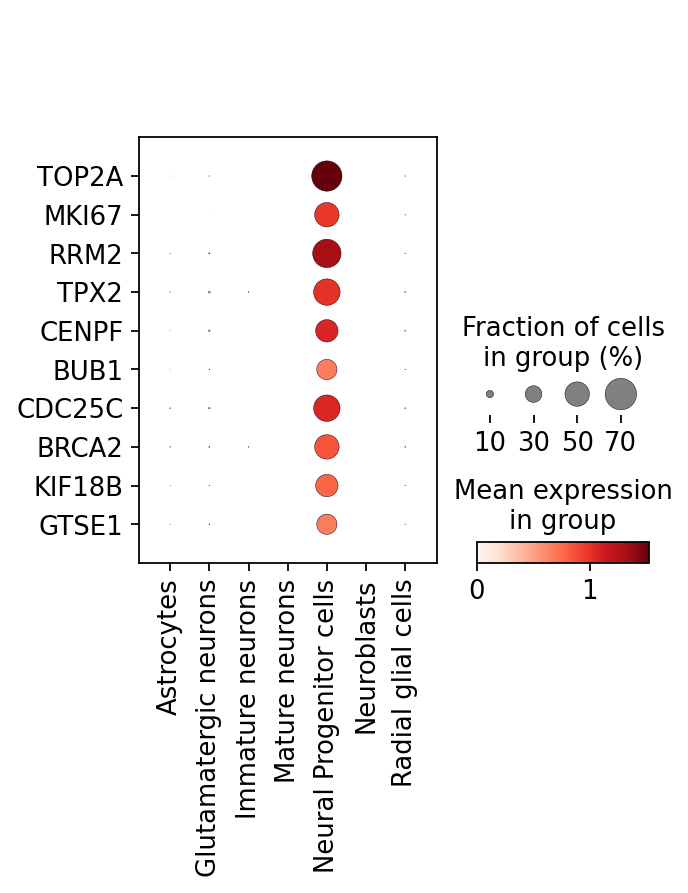

In [145]:
figsize(4,4)
sc.pl.dotplot(ad1, deg.gene[:10], groupby='louvain2',save='sfig4_dotplot_1.pdf',swap_axes=True)

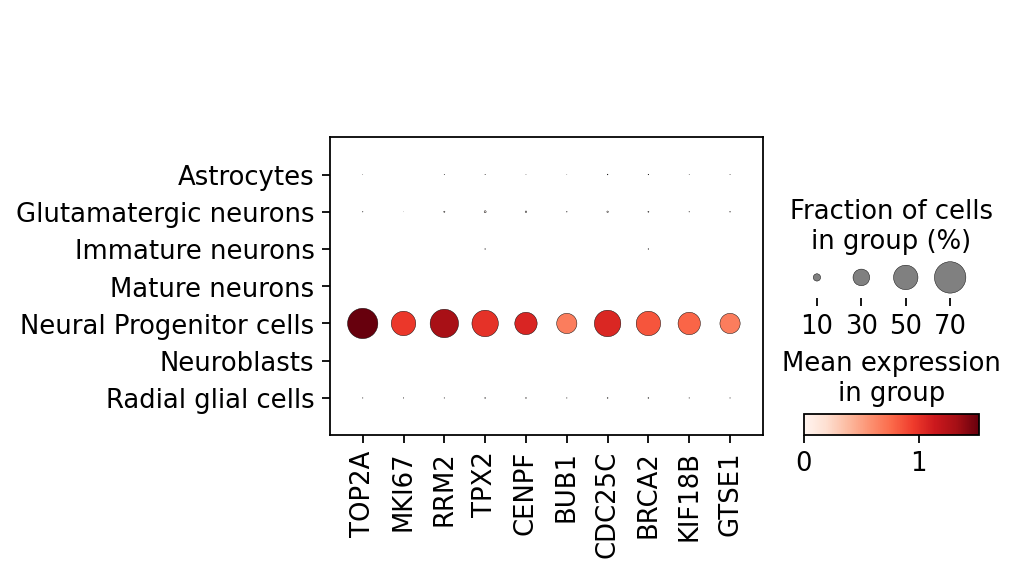

In [302]:
figsize(6,4)
sc.pl.dotplot(ad1, deg.gene[:10], groupby='louvain2',save='sfig4_dotplot_2.pdf')

In [303]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

Text(0.5, 1.0, 'MKI67')

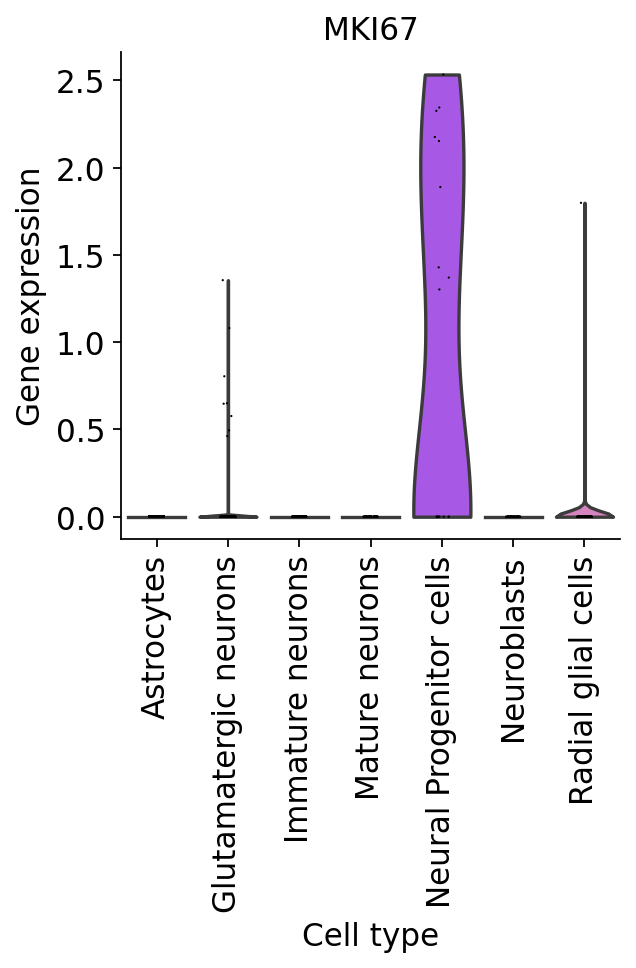

In [54]:
fig, ax = plt.subplots()
sc.pl.violin(ad1, ['MKI67'], groupby='louvain2',rotation=90,xlabel='Cell type',ylabel='Gene expression',ax=ax,show=False)
ax.set_title('MKI67')

## DEGs overlapping

In [37]:
import venn

In [38]:
dfs=[pd.read_csv(f"data/hipngs/{i}",index_col=0) for i in ['adult_npc_DEG.csv','fetal_npc_DEG.csv']]

In [39]:
dfs[0]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
TOP2A,8.167411e-130,2.986527,0.65,0.001,8.481040e-126
MKI67,1.474533e-107,2.089066,0.50,0.000,1.531155e-103
RRM2,3.249006e-100,2.532023,0.55,0.002,3.373767e-96
TPX2,8.704927e-93,2.005857,0.55,0.003,9.039196e-89
CENPF,2.867530e-87,2.743667,0.45,0.001,2.977643e-83
...,...,...,...,...,...
BRD8,9.993833e-01,-0.156855,0.10,0.098,1.000000e+00
UBE2G2,9.995342e-01,-0.242277,0.20,0.188,1.000000e+00
SAT1,1.000000e+00,-0.661523,0.15,0.138,1.000000e+00
MTIF3,1.000000e+00,-0.266300,0.10,0.097,1.000000e+00


In [ ]:
"#DD6091"

In [40]:
# Your list of hexadecimal color values
hex_colors = ['#DD6091', '#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC']

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')  # Remove the '#' if it exists
    lv = len(hex_color)
    return [int(hex_color[i:i + lv // 3], 16)/255 for i in range(0, lv, lv // 3)]+[0.5]

# Convert the list of hex colors to a list of RGB tuples
rgb_colors = [hex_to_rgb(color) for color in hex_colors]

# Print the list of RGB tuples
print(rgb_colors)

[[0.8666666666666667, 0.3764705882352941, 0.5686274509803921, 0.5], [1.0, 0.7137254901960784, 0.7568627450980392, 0.5], [0.8509803921568627, 0.7725490196078432, 0.4, 0.5], [1.0, 0.5019607843137255, 0.06666666666666667, 0.5], [0.5803921568627451, 0.25098039215686274, 0.9529411764705882, 0.5], [0.8901960784313725, 0.043137254901960784, 0.3607843137254902, 0.5], [0.6862745098039216, 0.8823529411764706, 0.6862745098039216, 0.5], [0.3254901960784314, 0.8274509803921568, 0.5215686274509804, 0.5], [0.0, 0.3764705882352941, 0.5686274509803921, 0.5], [0.4549019607843137, 0.792156862745098, 1.0, 0.5], [0.3607843137254902, 0.5372549019607843, 0.8, 0.5]]


Text(0.7, 0.76, 'Fetal')

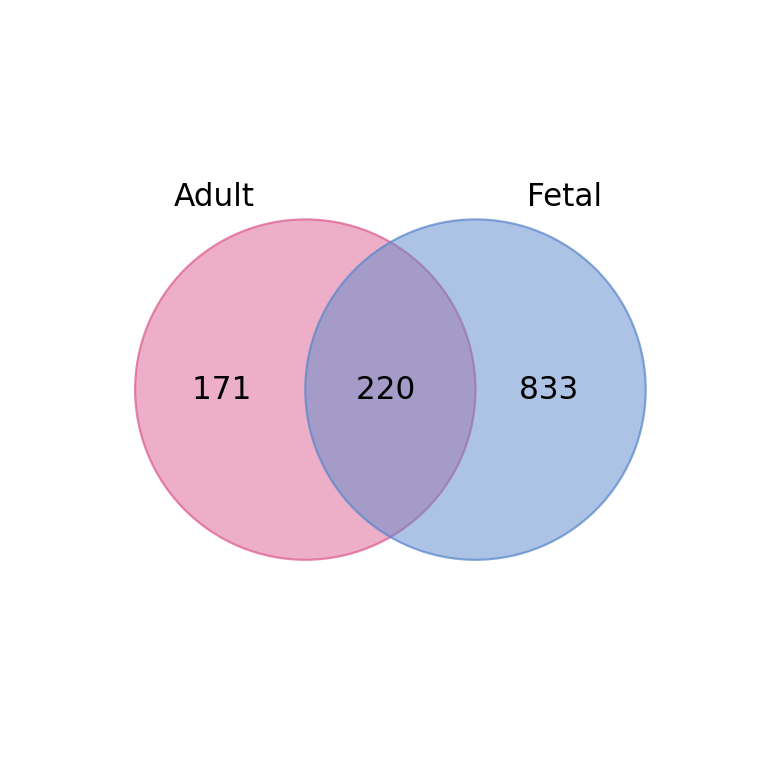

In [56]:
figsize(4,4)
names=['Adult', 'Fetal']
colors=rgb_colors[:4]
labels = venn.get_labels([set(i.index[(i.p_val_adj<0.05) & (np.abs(i.avg_log2FC)>0.25)]) for i in dfs[:2]], fill=['number'])
fig, ax = venn.venn2(labels, names=['A','B'],colors=[rgb_colors[i] for i in [0,-1]],figsize=(6,8))
ax.get_legend().remove()
#ax.text(0.13, 0.18, names[0],  fontsize=14, ha="right")
ax.text(0.3, 0.76, names[0],  fontsize=14, ha="right", va="bottom")
ax.text(0.7, 0.76, names[1],  fontsize=14, ha="left", va="bottom")
#ax.text(0.87, 0.3, names[3],  fontsize=14, ha="left", va="top")
#plt.savefig('figures/sfig4_venn.pdf',dpi=300, bbox_inches='tight',transparent=True)

## GO analysis plot

In [57]:
go=pd.read_csv('data/hipngs/npc_DEG_GOs_top.csv',index_col=0)

In [60]:
go.columns

Index(['ID', 'Description', 'GeneRatio', 'BgRatio', 'pvalue', 'p.adjust',
       'qvalue', 'geneID', 'Count', 'Celltype', 'logq', 'study'],
      dtype='object')

In [62]:
df=go[['Description','study','logq']].pivot(index='Description', columns='study', values='logq')

In [63]:
df=df.loc[pd.unique(go.Description),]

In [274]:
list(df.index)

['chromosome segregation',
 'mitotic nuclear division',
 'nuclear division',
 'DNA replication',
 'organelle fission',
 'regulation of mitotic cell cycle phase transition',
 'sister chromatid segregation',
 'nuclear chromosome segregation',
 'regulation of cell cycle phase transition',
 'mitotic sister chromatid segregation',
 'DNA-dependent DNA replication',
 'microtubule cytoskeleton organization involved in mitosis',
 'spindle organization',
 'mitotic spindle organization',
 'cell cycle G2/M phase transition',
 'nuclear DNA replication',
 'G2/M transition of mitotic cell cycle',
 'cell cycle DNA replication',
 'DNA conformation change',
 'DNA recombination']

In [64]:
df.index=['chromosome segregation',
 'mitotic nuclear division',
 'nuclear division',
 'DNA replication',
 'organelle fission',
 'regulation of mitotic \ncell cycle phase transition',
 'sister chromatid segregation',
 'nuclear chromosome segregation',
 'regulation of cell cycle \nphase transition',
 'mitotic sister \nchromatid segregation',
 'DNA-dependent DNA replication',
 'microtubule cytoskeleton \norganization involved in mitosis',
 'spindle organization',
 'mitotic spindle organization',
 'cell cycle G2/M phase transition',
 'nuclear DNA replication',
 'G2/M transition of \nmitotic cell cycle',
 'cell cycle DNA replication',
 'DNA conformation change',
 'DNA recombination']

In [68]:
df.columns=['Adult', 'Fetal']

In [70]:
import seaborn as sns

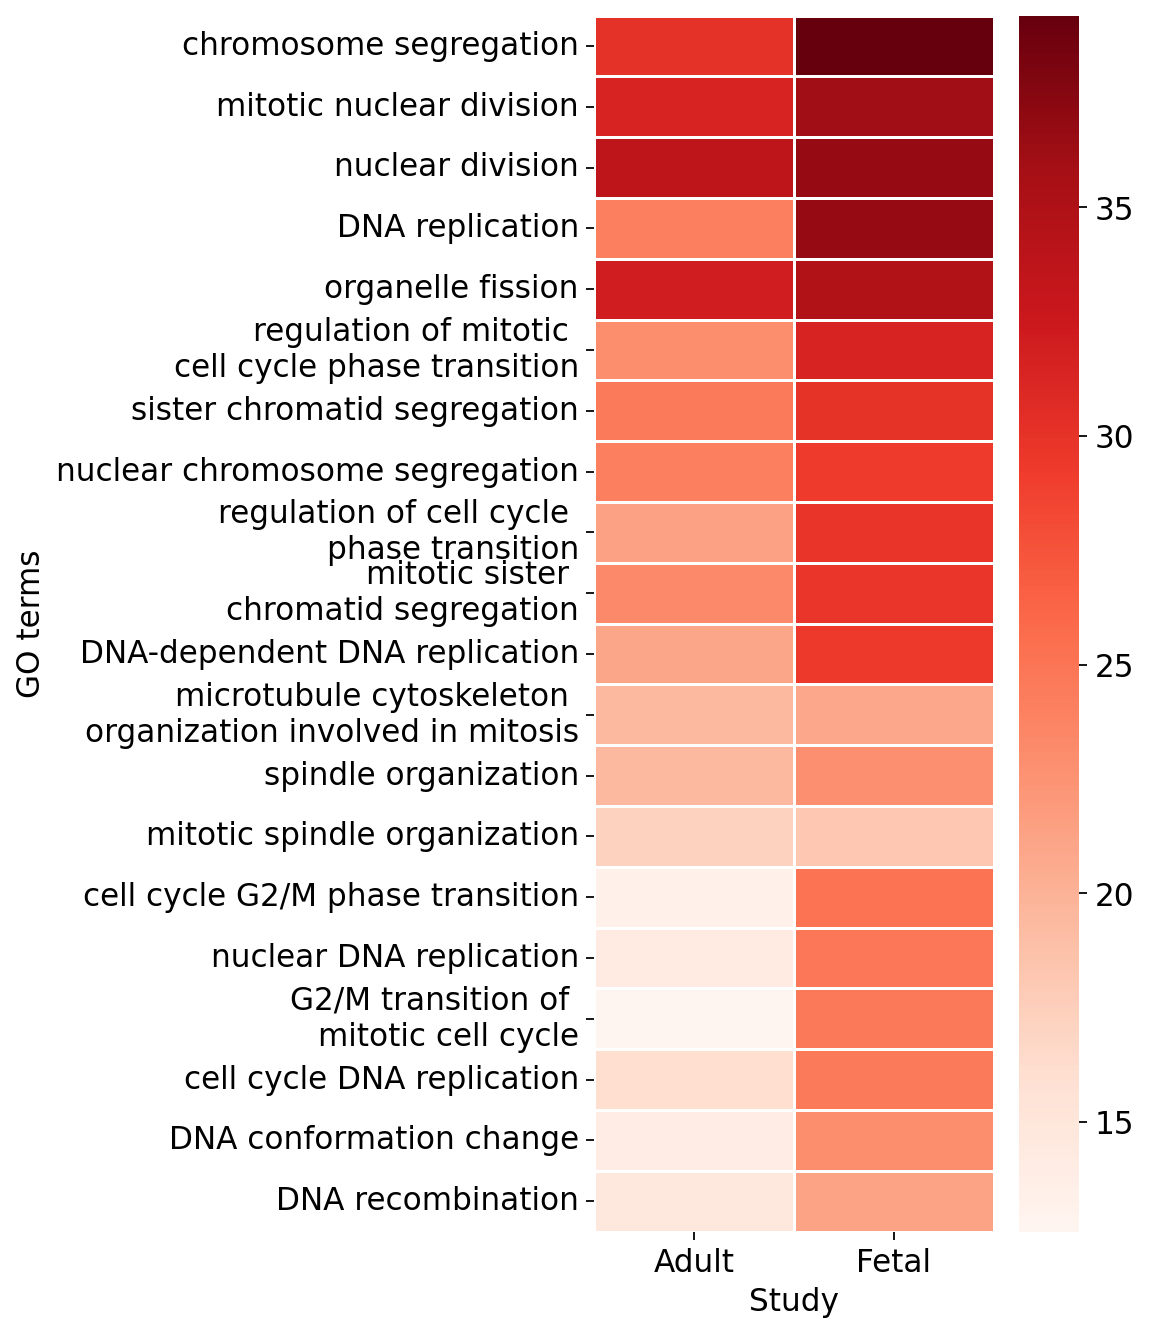

In [73]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Study')
plt.ylabel('GO terms')

# Show the plot
plt.show()

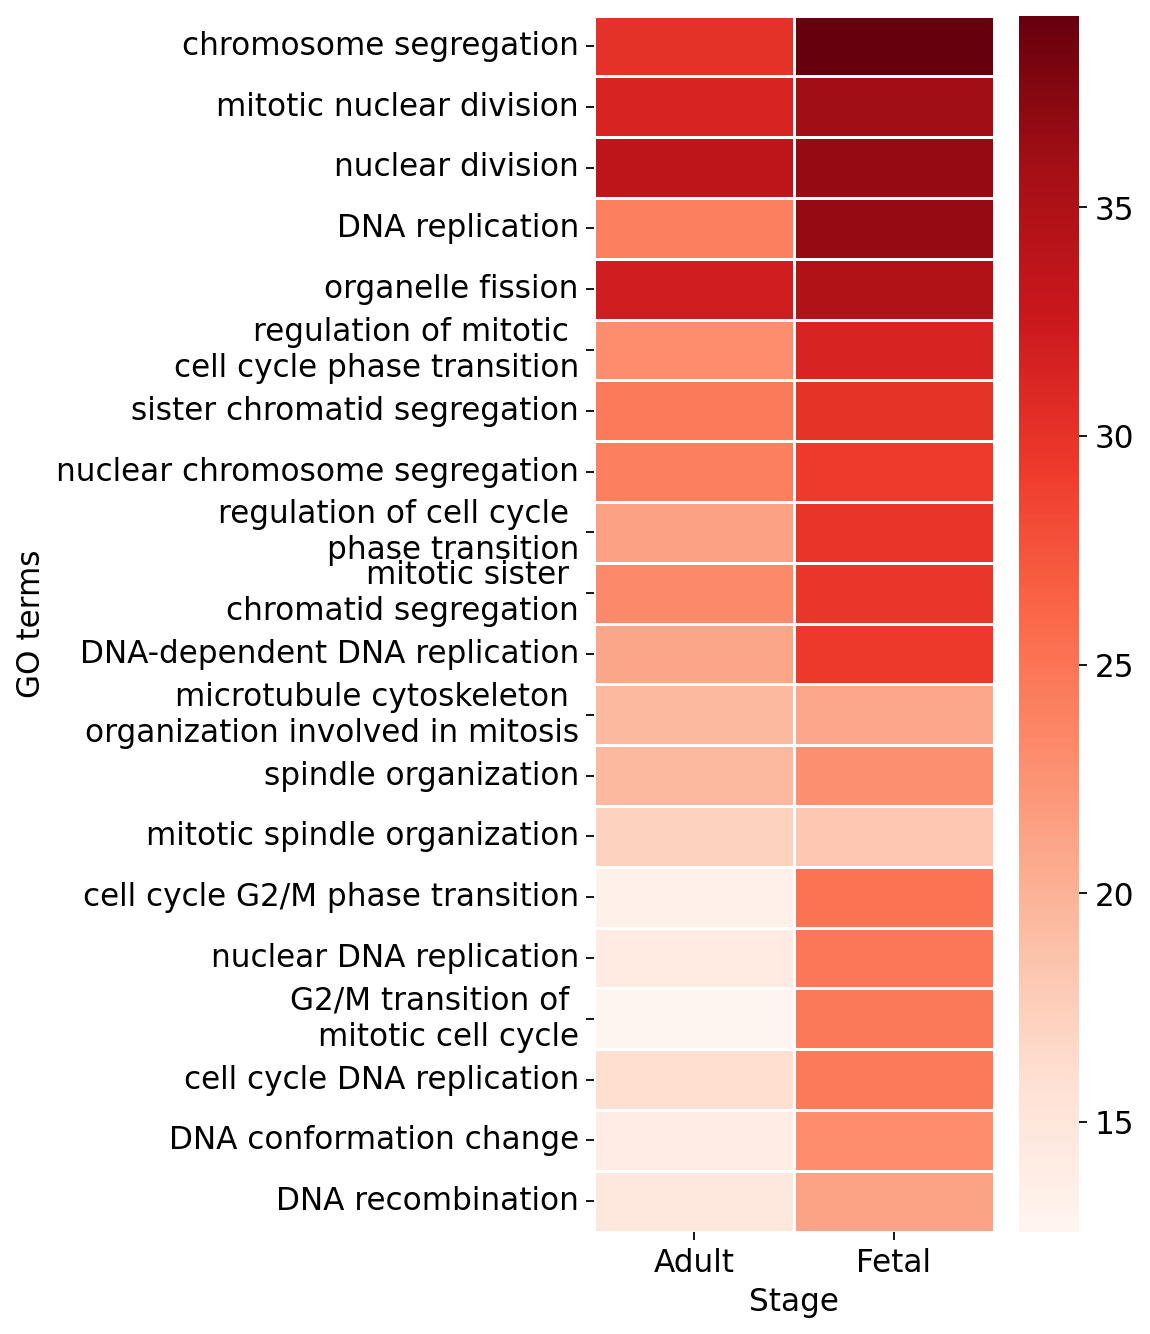

In [75]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.show()

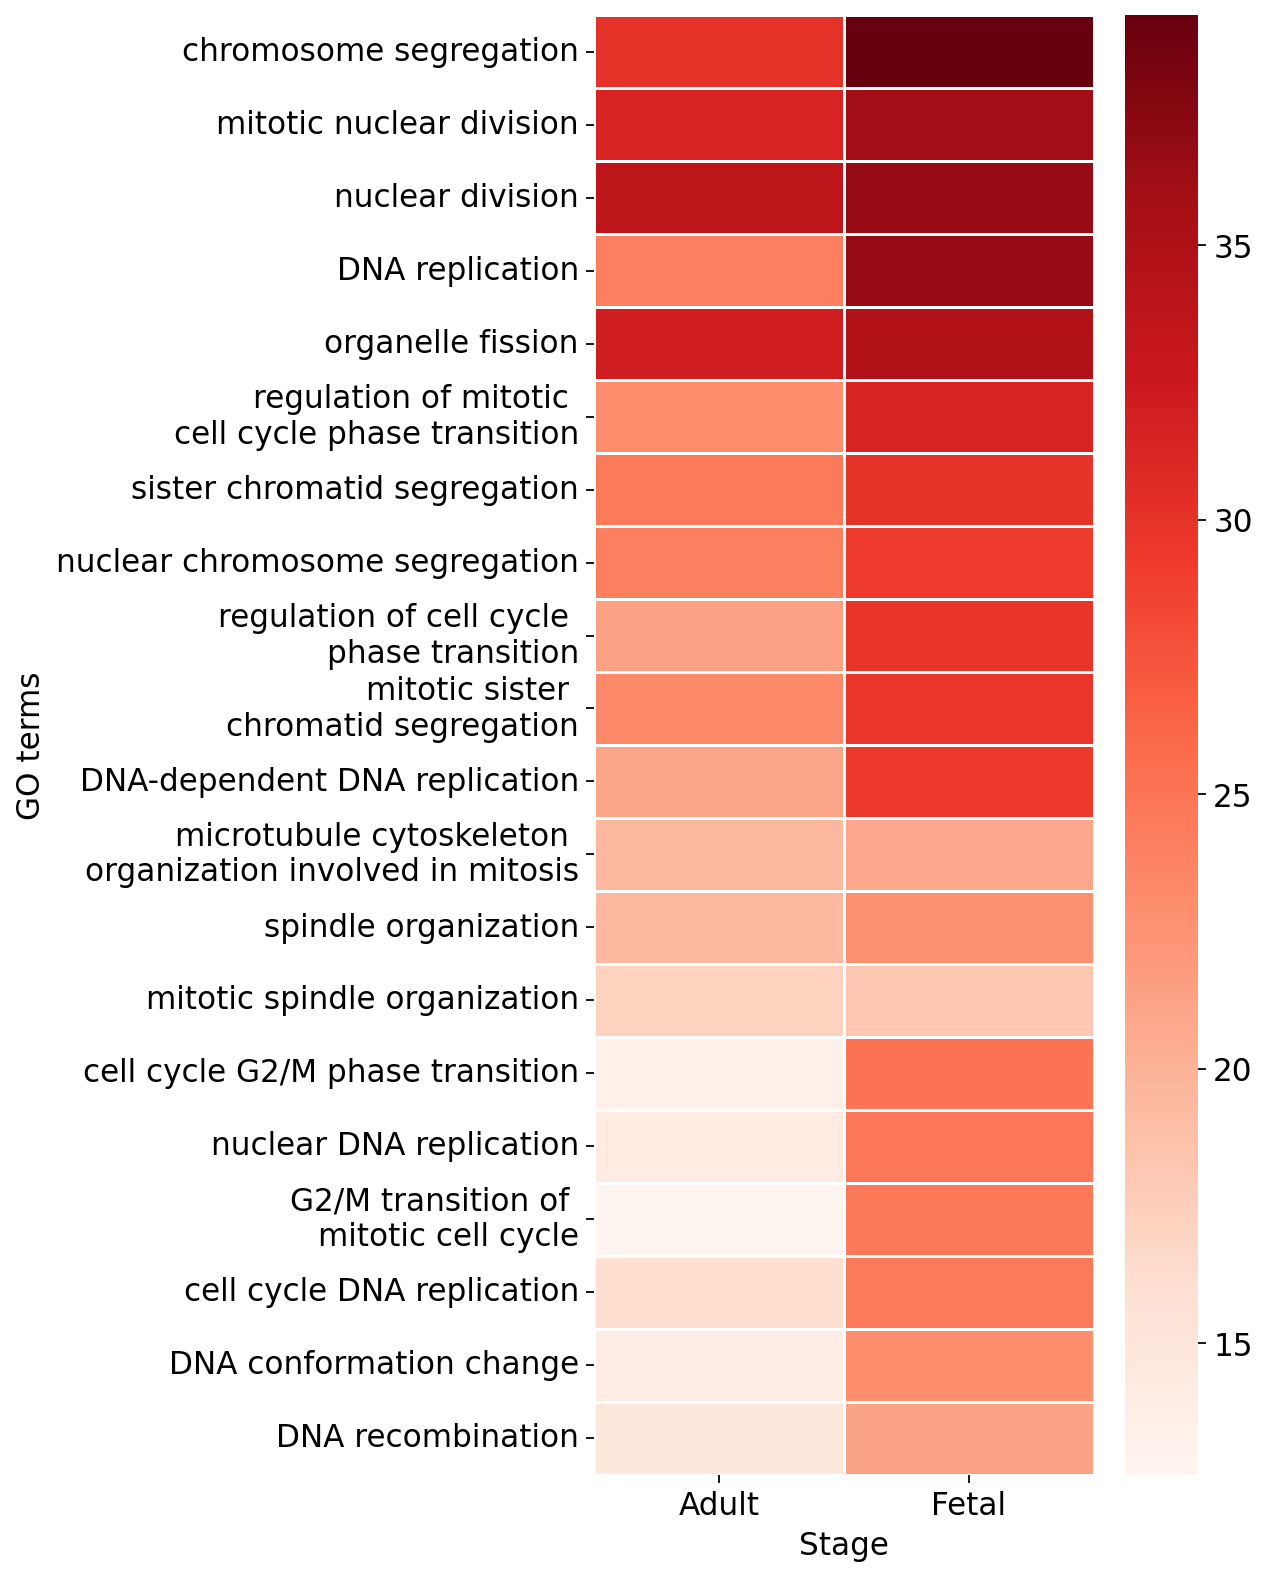

In [74]:
figsize(5,12)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.show()

## Selected GO terms

In [8]:
go1=pd.read_csv('data/hipngs/Choose_BP_Ex_fig2g.csv',index_col=0)

In [9]:
go1['logq']=-np.log(go1.qvalue)

In [10]:
df=go1[['Description','Celltype','logq']].pivot(index='Description', columns='Celltype', values='logq')

In [11]:
df=df.sort_values(by='Zhong2020',ascending=False)

In [12]:
df.columns=['Adult', 'Fetal']

In [13]:
df.index=['chromosome segregation', 'nuclear division', 'DNA replication',
       'organelle fission', 'cell cycle G2/M phase transition',
       'cell cycle DNA replication', 'spindle organization',
       'microtubule cytoskeleton organization \ninvolved in mitosis',
       'cell cycle checkpoint', 'cell cycle G1/S phase transition',
       'double-strand break repair',
       'metaphase/anaphase transition \nof mitotic cell cycle',
       'kinetochore organization', 'centrosome cycle', 'chromatin remodeling',
       'chromatin assembly', 'DNA synthesis involved in DNA repair',
       'mitotic chromosome condensation',
       'neural precursor cell proliferation', 'stem cell proliferation']

In [15]:
import seaborn as sns

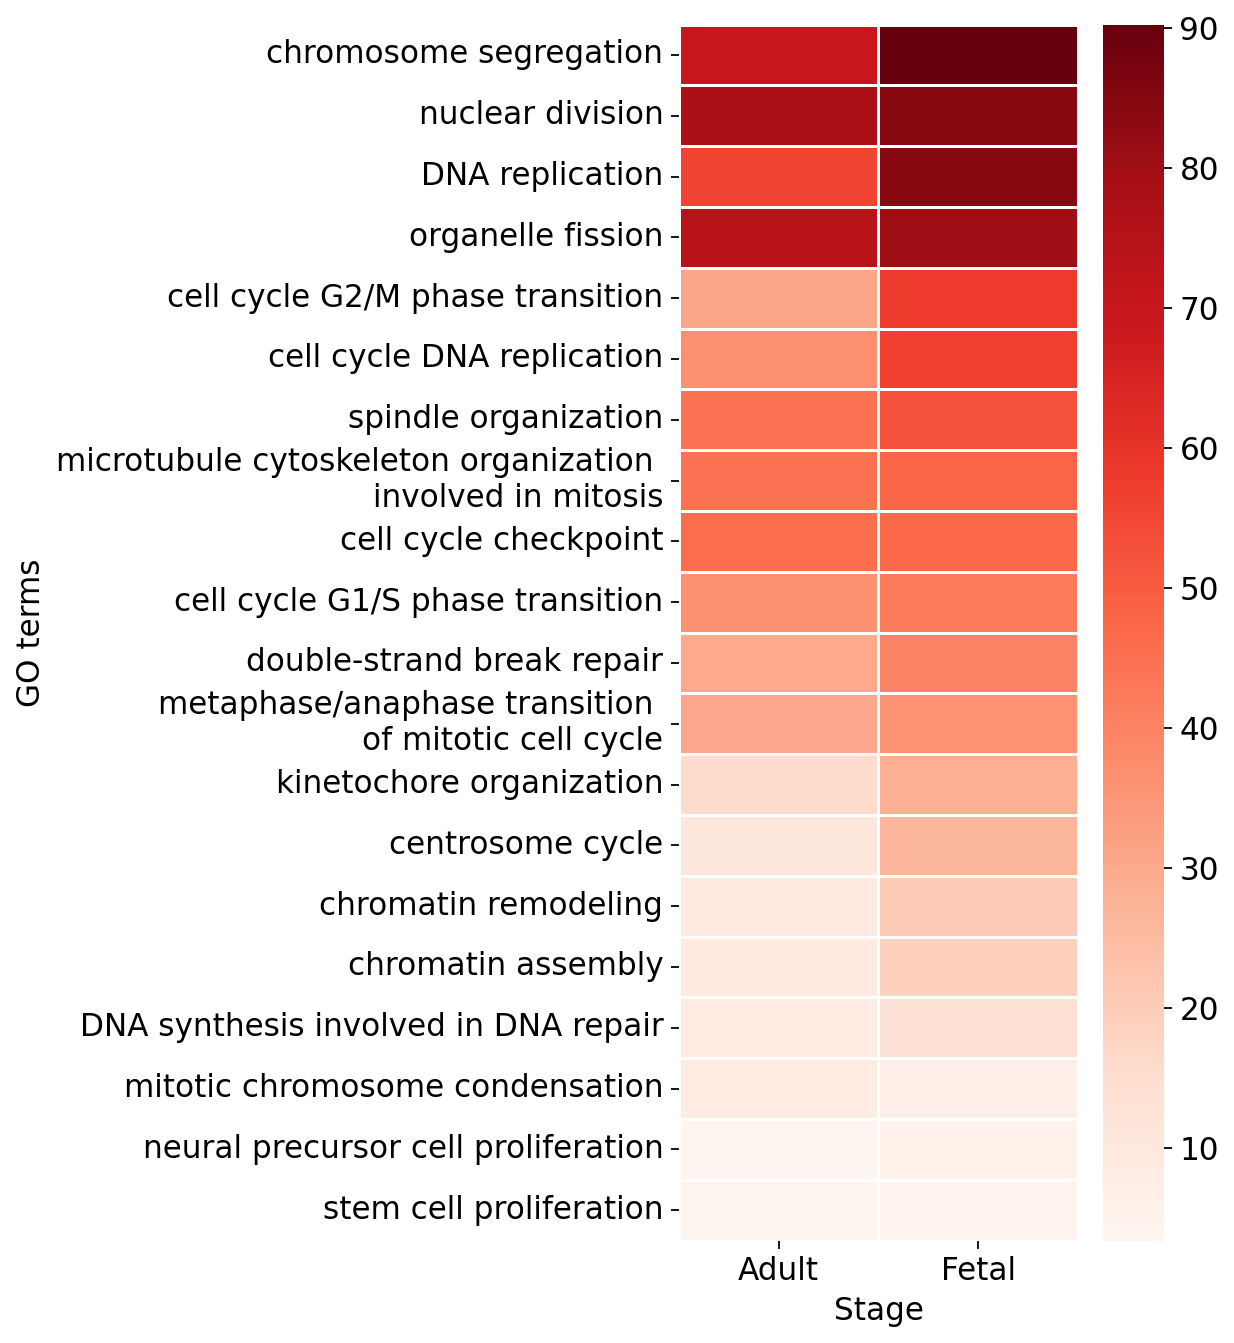

In [16]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.savefig('figures/go_terms.pdf',dpi=300, bbox_inches='tight',transparent=True)

# END